<a href="https://colab.research.google.com/github/GIT-gmp/Task--4-AI-ML/blob/main/Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Dataset Head ---
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst a

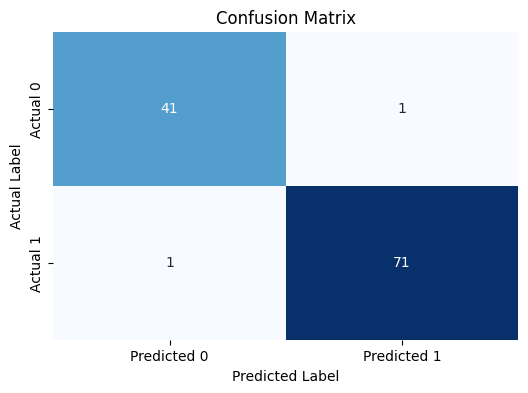


Precision: \$0.9861\$
Recall: \$0.9861\$
F1-Score: \$0.9861\$


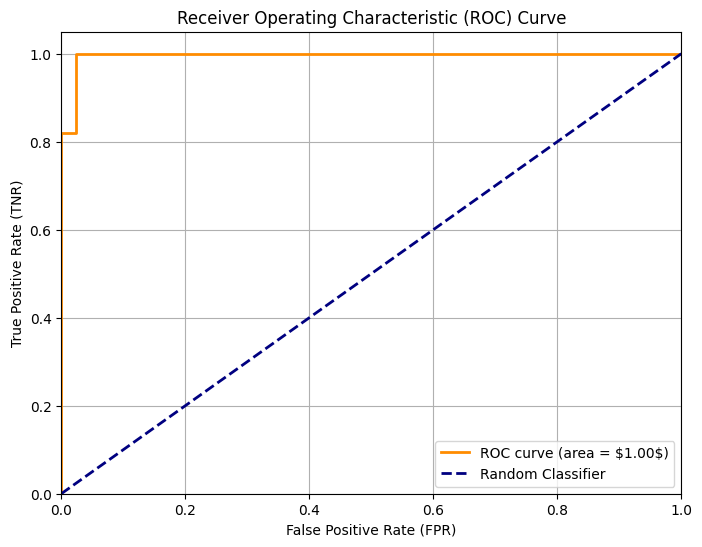


ROC-AUC Score: \$0.9957\$

--- Threshold Tuning ---
Optimal Threshold (Youden's J): \$0.3566\$
Metrics with Optimal Threshold:
  Accuracy: \$0.9912\$
  Precision: \$0.9863\$
  Recall: \$1.0000\$
  F1-Score: \$0.9931\$

--- Explanation of Sigmoid Function ---
The sigmoid function, also known as the logistic function, is a crucial component of Logistic Regression.
It maps any real-valued number into a value between 0 and 1, making it suitable for interpreting as a probability.
The formula for the sigmoid function is:
\$$
    \sigma(z) = rac{1}{1 + e^{-z}}
\$$
Where:
- \$z\$ is the input to the function, which in Logistic Regression is the linear combination of features and coefficients: \$z = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n\$.
- \$e\$ is Euler's number (approximately 2.71828).

**How it works in Logistic Regression:**
1.  The Logistic Regression model first calculates a linear score (\$z\$) for each data point based on its features and the learned coefficients.
2.  This linear sco

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


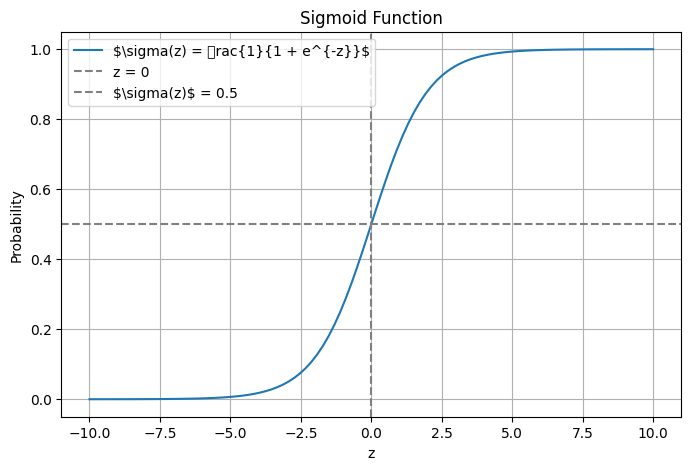

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    accuracy_score
)
from sklearn.datasets import load_breast_cancer # Import the breast cancer dataset

# Load the dataset
# Using the Breast Cancer Wisconsin (Diagnostic) dataset as it's a classic binary classification dataset.
# 'diagnosis' is the target variable (M=Malignant, B=Benign)
# try:
#     df = pd.read_csv('content/MyDrive/data.csv')
# except FileNotFoundError:
#     print("Error: data.csv not found. Please ensure the file is in the correct directory.")
#     exit()

# Load the Breast Cancer dataset from scikit-learn
breast_cancer = load_breast_cancer()
X_bc = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y_bc = pd.Series(breast_cancer.target, name='diagnosis') # Target is already numerical (1 for malignant, 0 for benign)

df = pd.concat([X_bc, y_bc], axis=1)


# --- 1. Choose a binary classification dataset ---
print("--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Dataset Description ---")
print(df.describe())

# Drop the 'id' column as it's just an identifier and not useful for modeling
# Also drop 'Unnamed: 32' if it exists (often an empty column in this dataset)
# The breast cancer dataset from sklearn does not have these columns
# if 'id' in df.columns:
#     df = df.drop('id', axis=1)
# if 'Unnamed: 32' in df.columns:
#     df = df.drop('Unnamed: 32', axis=1)

# Convert diagnosis to numerical (M=1, B=0) - This is already done in the sklearn dataset load
# df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("\n--- Dataset Head after Preprocessing ---")
print(df.head())
print(f"\nClass distribution:\n{df['diagnosis'].value_counts()}")

# Define features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# --- 2. Train/test split and standardize features ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing target distribution:\n{y_test.value_counts(normalize=True)}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Features Standardized ---")

# --- 3. Fit a Logistic Regression model ---
# Using a solver that works well with L2 regularization (default) and scaled data
# C is the inverse of regularization strength; smaller values specify stronger regularization.
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

print("\n--- Logistic Regression Model Training Complete ---")

# --- 4. Evaluate with confusion matrix, precision, recall, ROC-AUC ---
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class (1)

print("\n--- Model Evaluation ---")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: \${accuracy:.4f}\$")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nPrecision: \${precision:.4f}\$")
print(f"Recall: \${recall:.4f}\$")
print(f"F1-Score: \${f1:.4f}\$")

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = \${roc_auc:.2f}\$)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TNR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nROC-AUC Score: \${roc_auc:.4f}\$")

# --- 5. Tune threshold and explain sigmoid function ---

print("\n--- Threshold Tuning ---")
# Find the optimal threshold (e.g., using Youden's J statistic: max(tpr - fpr))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold (Youden's J): \${optimal_threshold:.4f}\$")

# Re-evaluate with the new threshold
y_pred_optimal_threshold = (y_proba >= optimal_threshold).astype(int)

optimal_precision = precision_score(y_test, y_pred_optimal_threshold)
optimal_recall = recall_score(y_test, y_pred_optimal_threshold)
optimal_f1 = f1_score(y_test, y_pred_optimal_threshold)
optimal_accuracy = accuracy_score(y_test, y_pred_optimal_threshold)

print(f"Metrics with Optimal Threshold:")
print(f"  Accuracy: \${optimal_accuracy:.4f}\$")
print(f"  Precision: \${optimal_precision:.4f}\$")
print(f"  Recall: \${optimal_recall:.4f}\$")
print(f"  F1-Score: \${optimal_f1:.4f}\$")

print("\n--- Explanation of Sigmoid Function ---")
print("The sigmoid function, also known as the logistic function, is a crucial component of Logistic Regression.")
print("It maps any real-valued number into a value between 0 and 1, making it suitable for interpreting as a probability.")
print("The formula for the sigmoid function is:")
print("\$$")
print("    \sigma(z) = \frac{1}{1 + e^{-z}}")
print("\$$")
print("Where:")
print("- \$z\$ is the input to the function, which in Logistic Regression is the linear combination of features and coefficients: \$z = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n\$.")
print("- \$e\$ is Euler's number (approximately 2.71828).")
print("\n**How it works in Logistic Regression:**")
print("1.  The Logistic Regression model first calculates a linear score (\$z\$) for each data point based on its features and the learned coefficients.")
print("2.  This linear score (\$z\$) is then passed through the sigmoid function.")
print("3.  The output of the sigmoid function, \$\sigma(z)\$, is a probability value between 0 and 1.")
print("4.  If \$\sigma(z)\$ is greater than or equal to a certain threshold (commonly 0.5), the data point is classified into the positive class (e.$\$g.\$, Malignant). Otherwise, it's classified into the negative class (e.$\$g.\$, Benign).")
print("\n**Importance:**")
print("-   It transforms the linear output into a probability, which is intuitive for classification tasks.")
print("-   It is differentiable, which is necessary for gradient-based optimization algorithms used in training.")
print("-   The 'S'-shaped curve allows it to handle non-linear relationships between features and the probability of the outcome.")

# Plotting the sigmoid function
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(8, 5))
plt.plot(z, sigmoid, label='\$\sigma(z) = \frac{1}{1 + e^{-z}}\$')
plt.axvline(0, color='gray', linestyle='--', label='z = 0')
plt.axhline(0.5, color='gray', linestyle='--', label='\$\sigma(z)\$ = 0.5')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
